In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Part 1: Regression on California Test Scores

#1. Find the url for the California Test Score Data Set from the following website:

#https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [6]:
Ca_df = pd.read_csv("../Data/Caschool.csv")
Ca_df.head(10)
Ca_df=Ca_df.iloc[:, 1:] #delete first column
Ca_df.head(10)

,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
5,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759,605.700012,605.400024
6,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949,604.500000,609.000000
7,63834,Kern,Vineland Elementary,KK-08,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461,605.500000,612.500000
8,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157,608.900024,616.099976
9,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921,611.900024,613.400024


In [7]:
# 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.  

target=Ca_df["testscr"]
var=Ca_df.iloc[:,5:8] #three continuous explanatory variables
var.head(10)


,teachers,calwpct,mealpct
0,10.900000,0.510200,2.040800
1,11.150000,15.416700,47.916698
2,82.900002,55.032299,76.322601
3,14.000000,36.475399,77.049202
4,71.500000,33.108601,78.427002
5,6.400000,12.318800,86.956497
6,10.000000,12.903200,94.623703
7,42.500000,18.806299,100.000000
8,19.000000,32.189999,93.139801
9,108.000000,78.994202,87.316399


In [8]:
teach=var.iloc[:,0]
calwp=var.iloc[:,1]
mealp=var.iloc[:,2]

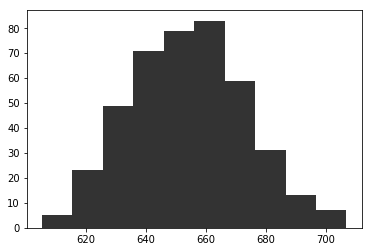

In [9]:
#Target vis
num_bin=10
plt.hist(target, num_bin,color='black', alpha=0.8)
plt.show()

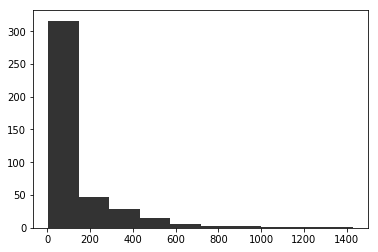

In [10]:
#Calwp vis
num_bin=10
plt.hist(teach, num_bin,color='black', alpha=0.8)
plt.show()

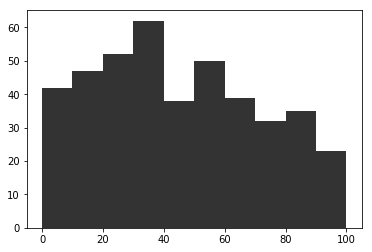

In [11]:
#Mealp vis
num_bin=10
plt.hist(mealp, num_bin,color='black', alpha=0.8)
plt.show()

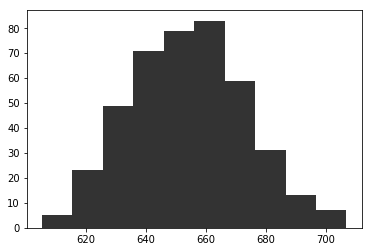

In [12]:
#Target vis
num_bin=10
plt.hist(target, num_bin,color='black', alpha=0.8)
plt.show()

In [13]:
#1.2 Visualize the dependency of the target on each feature from 1.1.

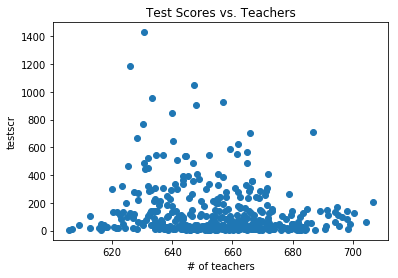

In [14]:
plt.scatter(target, teach)
plt.title("Test Scores vs. Teachers")
plt.xlabel("# of teachers")
plt.ylabel("testscr")
plt.show()

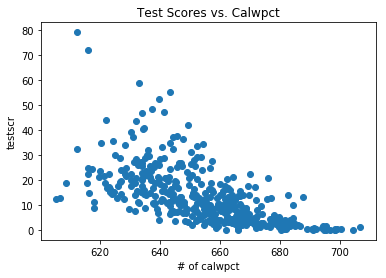

In [15]:
plt.scatter(target, calwp)
plt.title("Test Scores vs. Calwpct")
plt.xlabel("# of calwpct")
plt.ylabel("testscr")
plt.show()

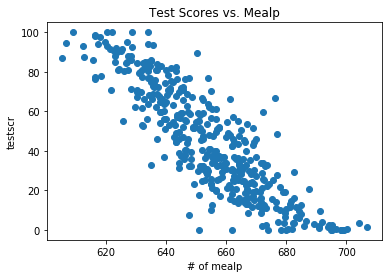

In [16]:
plt.scatter(target, mealp)
plt.title("Test Scores vs. Mealp")
plt.xlabel("# of mealp")
plt.ylabel("testscr")
plt.show() 


In [17]:
# 1.3Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset 
#and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default 
#parameters. Does scaling the data with the StandardScaler help?

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y=target
X=var
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
X_train.head()

,teachers,calwpct,mealpct
3,14.000000,36.475399,77.049202
18,303.029999,21.282400,94.971199
393,6.910000,10.071900,9.352500
60,37.119999,25.921101,83.157898
203,15.850000,5.537500,28.664499


In [ ]:
#KNN

In [28]:
#Train with k=5
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils
#Print accuracy rounded to two digits to the right of decimal
#print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))
#y_pred = knn.predict(X_test) # y_pred includes your predictions

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))


[110   6 272  33 141 102  36  66 215 216  80 223 239 263  10   1 137 270
  64  58 249  13  90 271  73  70 204 188  91 103 256 214 146 101 199  65
 123 133 105 124  45 121 113  42 145  74 153 173 166 229 259 242 260 225
 232  17  89 243 120 157 207  32  67 229 136   0 210 200 106  99   3 152
  60  44 269 254 115 273 165 171 275 287  50 154 111 134  97  83  52  40
 159  78  54  94 221 268  55 245  39   9  18  95  77 160 140 125  39 236
 278 172 174 230 176  79  96 224  47 246 151 163 247 251 192 220 126 191
 226 198 205  82  19   4 197 127 178  68 122 181 212 196 274  72 267 277
 281 209 162 262 185 112 253  87 135 162  71  75 155 234 195  81 244  63
 217  84 279  23 266  38  46 169 128 107   4  16  12 117  93 231 219 152
  53  27 167 218 222 122  21 283 143 194 177 241  69 179 258  57 158 282
 147 118  55 201 149  34  24  14 187 138 257  11 284 161 183 198 109 248
  88  35  86  81   2  37 206   5 104  20 276 235 150 193 261 164 144 147
 203 264 175 285 264 208 188 139 109  22 150 131 21

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, training_scores_encoded)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:

print(X_test.shape)
print (y_test.shape)

test_scores_encoded = lab_enc.fit_transform(y_test)
print(test_scores_encoded)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(test_scores_encoded))
print("accuracy: {:.2f}".format(knn.score(X_test, test_scores_encoded)))
y_pred = knn.predict(X_test)
print(y_pred)

(105, 3)
(105,)
[ 40  77  46  87 101  22  38  39   9  21  20  32  86  30  75  99   1  59
  50  56  48  57  79  55  16  80  17  72  63  27  76  35  52  49  78  47
  54  12  43  61  23  24 100  11  34  90  41  70  85   2  26  74  94   5
  93  65  66  64  25  28  81  33   8  91  44  84  62  13  45  88  36  83
  71  63   6  15  68  31  96  97  18  98   7   4  19  37  10  29  69  89
  77  42  58  51  53   0  14  67  95  82  62   3  92  60  73]
continuous
multiclass
multiclass
accuracy: 0.01
[ 23  78  24 132 137  29  82  82  23   2  21  52 109  99 135 188  17 117
  60  24  30 108 139 117  54 132   6  48  99  70 147   6 102  98  79  53
 235  11  82 198  11 132 220  31  10 170  31 139 198   1  60 198 188  11
 148  84 109 120   2  23 160  23  17 167  31  57 120  27 108 131  31 122
 127  91  31  20 175  78 120 261  16 218  11   5  23  53  16   4 132 109
 154  32 167  60  27   0  24 139 228 129  20   1  86  67 160]
